In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('kc_house_data.csv')
# On ne garde que les colonnes numériques
subdataset = dataset.select_dtypes(include = ['int64',  'float64'])
subdataset = subdataset[:10000] # On ne garde que les 10 000 premières lignes
subdataset.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


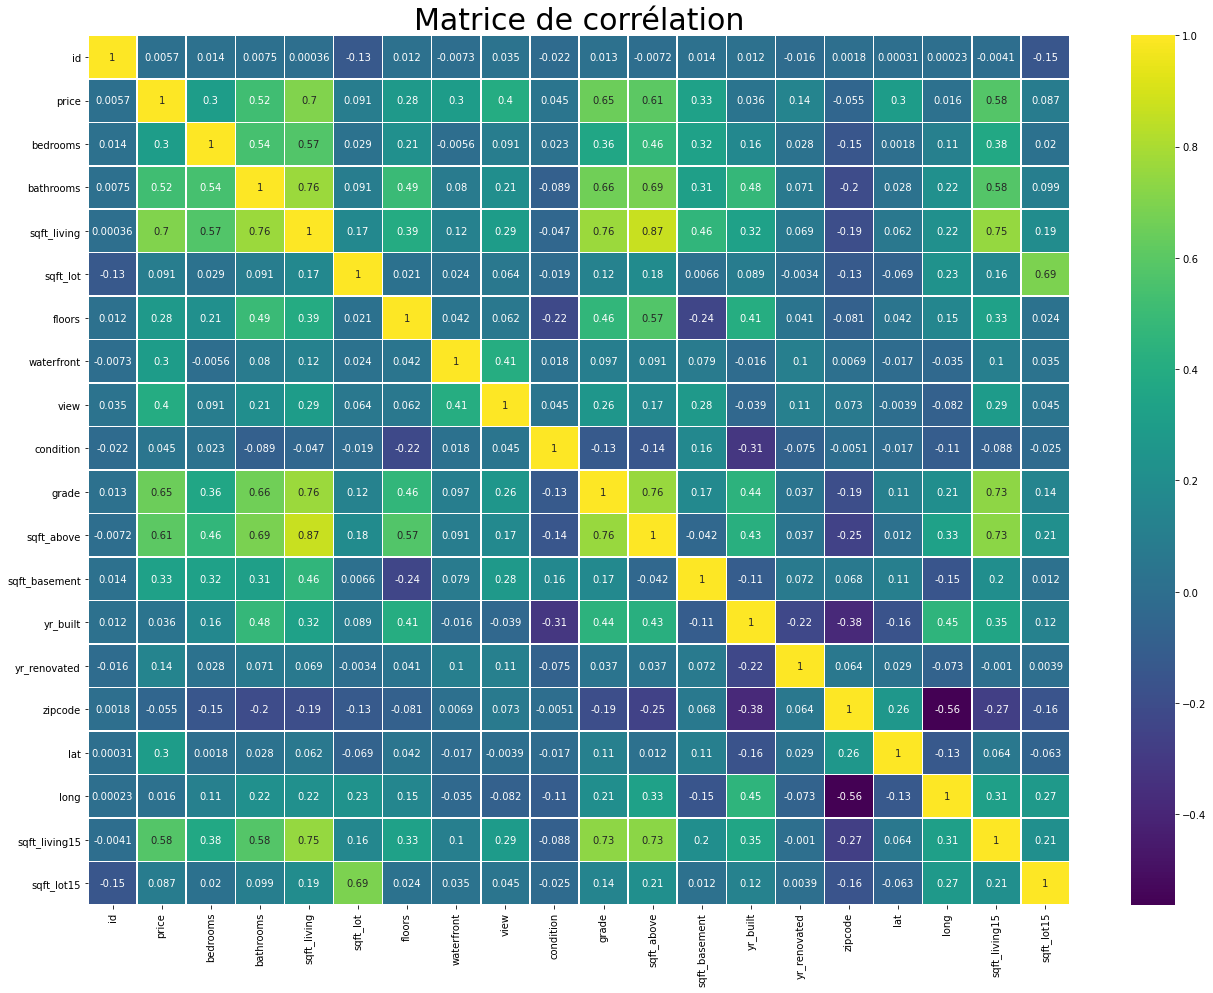

In [22]:
#Matrice de corrélation
plt.figure(figsize = (22,16))
corrMatrix = subdataset.corr()

sns.heatmap(corrMatrix, 
        xticklabels=corrMatrix,
        yticklabels=corrMatrix,
        linewidths=.5,
        annot=True,
        cmap='viridis')
plt.title('Matrice de corrélation', fontsize = 30)
plt.show()

# On prend la variable la plus corrélée au prix, <=>  la taille du logement (sqft_living)
# avec un coefficient de corrélation de Pearson de 0.7

In [3]:
X = subdataset['sqft_living'].values # On passe les données en tableaux numpy
X = (X - np.mean(X))/np.std(X)  # Standardisation des données
y = subdataset['price'].values
X = np.reshape(X, (X.shape[0], 1)) # Pour éviter les erreurs
y = np.reshape(y, (y.shape[0], 1))
X = np.hstack((X, np.ones(X.shape))) # On ajoute la colonne des biais
theta =  np.random.rand(X.shape[1],1) # On  créer notre vecteur théta

In [4]:
# On utilise la vectorisation pour optimiser le code
def hypothesis(X, theta):
    return np.dot(X,theta)

In [5]:
# On définit la fonction de coût J(theta) qui correspond à la MSE
def J(X, y, theta):
    m = y.shape[0]
    return (1/(2*m)) * sum((X.dot(theta) - y)**2) 

In [6]:
# La dérivée  de J utilisée dans la descente de gradient
def grad(X, y, theta):
    m = y.shape[0]
    return (1/m) * X.T.dot(X.dot(theta) - y)

In [7]:
# L'algorithme de descente de gradient avec por défault, alpha = 0.05 et le nombre d'itérations à 2000
def grad_desc(X, y, theta, alpha = 0.05, nb_iter = 2000):
    lossList = []
    for i in range(nb_iter):
        lossList.append(J(X, y, theta))
        theta = theta - alpha * grad(X, y, theta)
    return theta, lossList

In [8]:
theta, lossList = grad_desc(X, y, theta, alpha =  0.05,  nb_iter = 2000)

In [9]:
listGraph = lossList[:80]

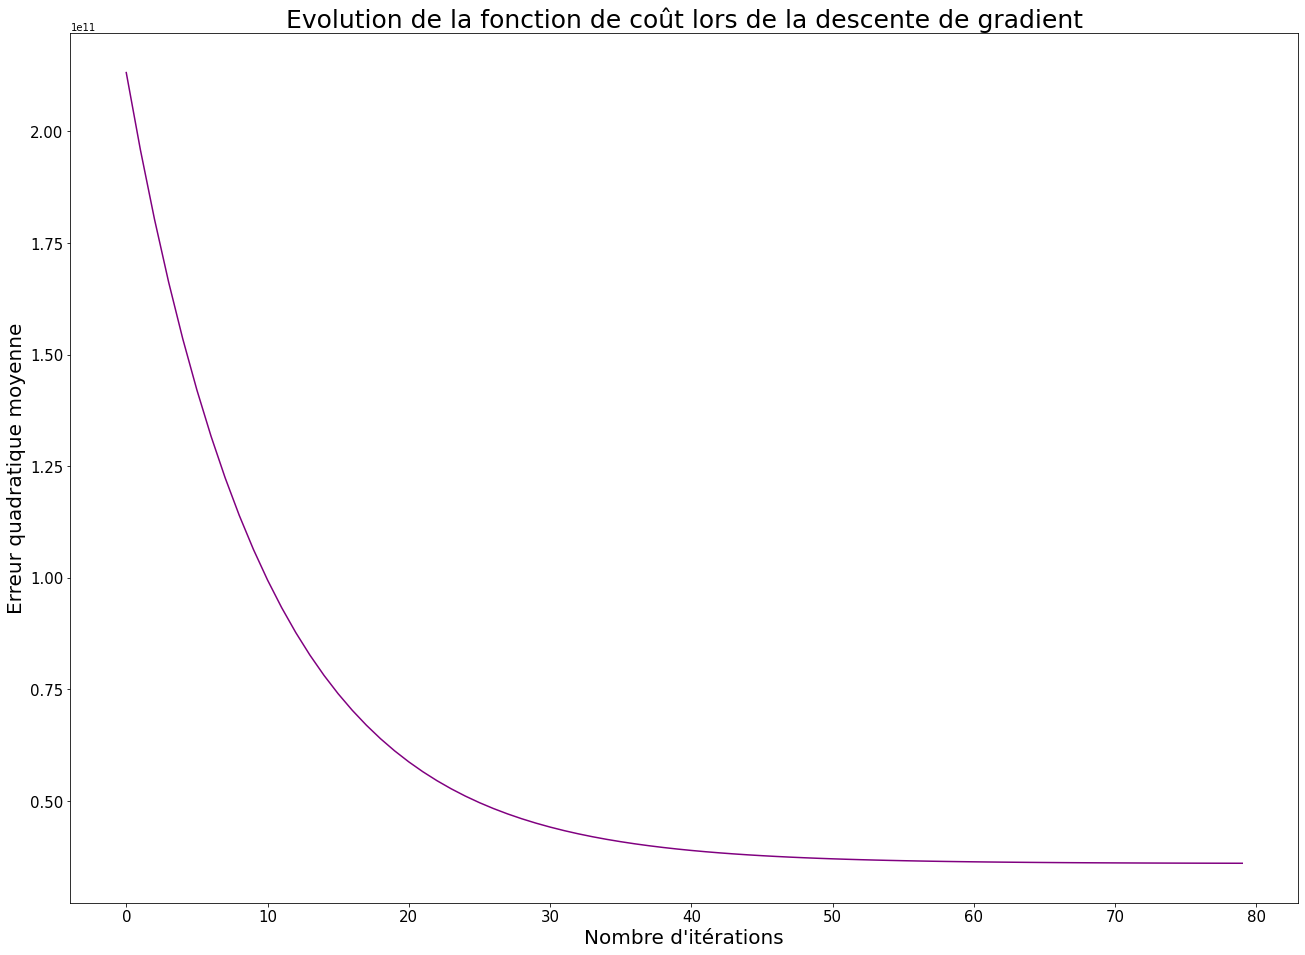

In [23]:
# Représentation graphique de l'évolution des résultats de la  fonction coût, elle semble converger
plt.figure(figsize = (22,16))
plt.plot(range(len(listGraph)), listGraph, c = 'purple')
plt.xlabel('Nombre d\'itérations', fontsize = 20)
plt.ylabel('Erreur quadratique moyenne', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Evolution de la fonction de coût lors de la descente de gradient',  fontsize = 25)
plt.show()

#Note : Il semble qu'on atteint une convergence autour de la 60e itérations de la descente de gradient

Text(0.5, 1.0, 'Modèle de régression linéaire univarié')

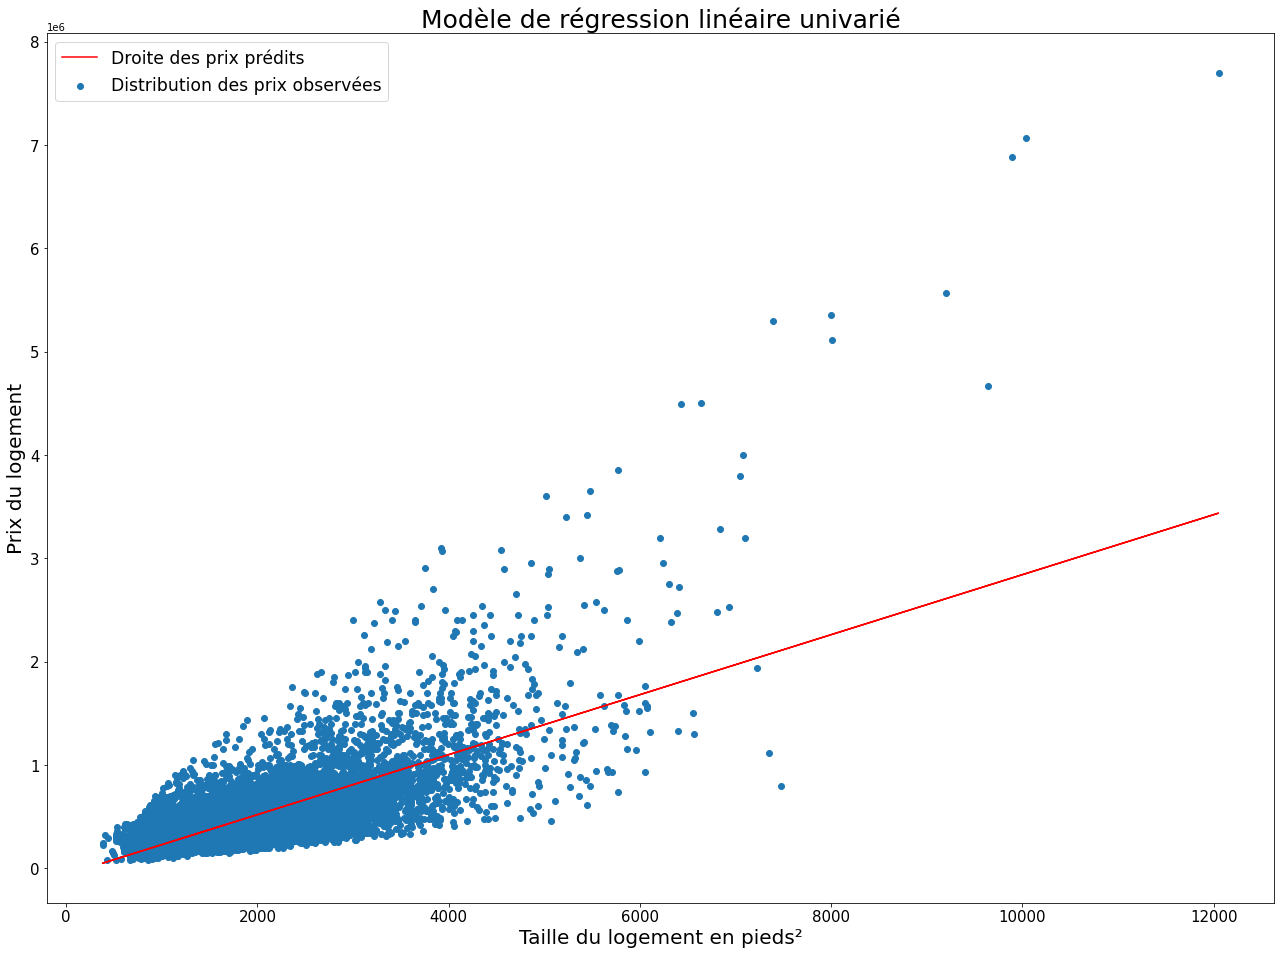

In [27]:
# Affichage du modèle
plt.figure(figsize = (22,16))
predictions = hypothesis(X, theta)
plt.scatter(subdataset['sqft_living'].values, y, label = 'Distribution des prix observées')
plt.plot(subdataset['sqft_living'].values, predictions, c='red',label = 'Droite des prix prédits')
plt.xlabel('Taille du logement en pieds²', fontsize = 20)
plt.ylabel('Prix du logement', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 'xx-large')
plt.title('Modèle de régression linéaire univarié', fontsize = 25)

In [12]:
lossList[len(lossList)-1]
# Le coût minimum (dernier obtenu) est très élevé, notre modèle est peu efficace

array([3.5985254e+10])

In [13]:
# Calcul du coefficient de détermination (R²)
u = ((y - predictions)**2).sum()
v = ((y - y.mean())**2).sum()
R =  1 - u/v
print('R² : '+str(R))
# Permet de prédire  49.3 % des points, le modèle est mauvais pour nos données

R² : 0.4930422923179073


In [14]:
#Equation normale :
def equation_Normale(X, y):
    return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
theta2 =  equation_Normale(X, y)
print(theta - theta2)

[[-3.49245965e-10]
 [-1.04773790e-09]]


In [15]:
# L'écart des thétas obtenus entre nos deux méthodes est pratiquement nul, cela semble vérifier nos résultats